In [6]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## PDEs: wave equation in 1 dimension

See Chapter 21 of your textbook. The basic form is

$$\frac{1}{c^2}\frac{\partial^2 f}{\partial t^2} - \frac{\partial^2 f}{\partial x^2} = 0$$

Why is this a wave equation?

**Example**: a string stretched between two fixed endpoints.

* linear mass density $\mu$ and tension $T$.

The motion in $y$ (transverse to the string) is caused by the force $F_y = m a_y$.

<img src="Figures/Figure_21.1.png" width="75%">

$$\sum F_y = \mu \Delta x \frac{\partial^2 y}{\partial t^2}$$

which is due to the tension component $T_y$ (neglecting gravity -- but see sections 21.4.1-21.4.3 for waves on a catenary, and section 21.4 discusses non-uniform mass density).

$$T_y = T\sin\theta(x+\Delta x) - T\sin\theta(x)$$

Non-linear wave equations are treated in chapters 24 and 25 of your textbook. For now, we are working on linear wave equations:

If $\theta$ is small enough so that $\sin\theta \simeq \tan\theta =\partial y/\partial x$, then 

$$T_y = T \left. \frac{\partial y}{\partial x}\right|_{x+\Delta x} 
- T \left.\frac{\partial y}{\partial x}\right|_x \simeq T \frac{\partial^2
y}{\partial x^2} \Delta x$$


$$\frac{\partial^2 y(x,t)}{\partial x^2} = \frac{\mu}{T} \frac{\partial^2 y(x,t)}{\partial t^2}$$

Voilà: a wave equation with wave velocity $c = \sqrt{T/\mu}$.

As always, boundary conditions rule.

### Analytic Solution

Separation of variables: posit

$$y(x,t) = X(x)T(t)$$

leading to

$$\frac{d^2 T(t)}{dt^2} +\omega^2 T(t) = 0, \quad \frac{d^2
X(x)}{dx^2} +k^2 X(x) = 0,\quad c { = } \frac{\omega}{k}$$

and each of these equations has its own boundary conditions that must be satisfied.

#### Spatial part

There are infinitely many solutions, indexed by $n$.  Each mode $n$ has a different wavenumber $k_n$.
The spatial solution $X(x)$ has the general solution

$$X_n(x) = A_n \sin {k_n x} + D_n \cos {k_n x}, \quad k_n = \frac {\pi (n+1) } {L}, \quad n = 0, 1, \ldots$$

If the **initial condition** is that the string is fixed at the ends ($x=0,L$), then $D_n =0$ for all of the coefficients.

#### Temporal part

There are also infinitely many solutions, indexed by $n$.  Each mode $n$ has a different frequency $\omega_n$:

$$T_n(t) = C_n \sin \omega_n t + D_n \cos \omega_n t, \quad
\omega_n = n  c k_0 = n \frac{2\pi c}{L}$$

If the **initial condition** is that the string is released from rest ($\partial y/\partial t$), then the $C_n$ must all be 0, and the $D_n$ can be absorbed into the definition of the $B_n$ when the spatial and temporal parts are put together: 

$$y(x,t) = \sum_{n=0}^\infty B_n \sin k_nx \cos \omega_n t, \quad n=0, 1,
\ldots$$


### Numerical Solution

First, realize there are three distinct numerical quantities with dimension speed:
1. the wave propagation speed, $c$
2. the speed of the physical string $\frac{\partial y}{\partial t}$ at each point along the string.
3. the ratio $C'=\frac{\Delta x}{\Delta t}$, where these are the step sizes of the algorithm in $x$ and $t$. This ratio is useful in a stability analysis.

As with other PDEs, use the central-difference approximations (aka "midpoint algorithm") for the second derivatives to convert the differential wave equation into a finite difference equation, and use a grid of $x$ and $t$ values to solve the equations.

$$\frac{\partial^2 y }{\partial t^2} \simeq
\frac{y_{i,j+1}+y_{i,j-1}-2 y_{i,j}}{(\Delta t)^2}, \quad
\frac{\partial^2 y}{\partial x^2} \simeq \frac{y_{i+1,j}
+y_{i-1,j}-2 y_{i,j}} {(\Delta x)^2}$$

These can be substituted into the differential equation to obtain the finite difference equation:

$$
\frac{y_{i,j+1}+y_{i,j-1}-2 y_{i,j}} {c^2 (\Delta t)^2}  =
\frac{y_{i+1,j}+y_{i-1,j}-2 y_{i,j}} {(\Delta x)^2}$$

Notice that this equation contains three time values: 
* $j+1 = $ "the future," 
* $j  = $ "the present," and 
* $j - 1 = $ "the past." 

As before, rearrange to get the future value in terms of current or prior values (aka "explicit" method):

$$\boxed{y_{i,j+1}  = 2 y_{i,j}-y_{i,j-1}+ \frac{c^2 }
{C'^{2}} \left [ y_{i+1,j}+y_{i-1,j}-2 y_{i,j}\right]},$$

where $C'\equiv \frac {\Delta x}{\Delta t}$ is a combination of algorithm parameters with the dimension of velocity whose size relative to $c$ determines the stability of the
algorithm. (It turns out we need $c/C' \le 1$ for stability, as we will see below.)

The algorithm propagates the wave from two
earlier times, $j$ and $j-1$, and from three nearby positions, $i-1$,
$i$, and $i+1$, to a later time $j+1$ and a single space position $i$.

<img src="Figures/Figure_21.2.png" width=40%>


Note: 
* again, we do not have boundary conditions in the time domain (we don't know the final outcome), but we do know initial conditions (position and velocity for each part of the string), so we use a time-stepping method instead of a relaxation method.
* The main difference with respect to the heat equation is that we are pulling in terms from time step $j-1$ and not just $j$.  (There are four terms in total, instead of three.)

Initializing the stepping algorithm in the box above is therefore tricky:
* The starting state is for one time value only, but the algorithm needs two time values to start stepping. 
* Since the velocity is a time derivative, we can write it in terms of a central-difference equation, and set it to 0 for the initial condition:

$$\frac{\partial y}{\partial t}(x,0) \simeq \frac{y(x, \Delta t)- y(x,
-\Delta t)}{2\Delta t}=0, \ \Rightarrow \ y_{i, 0} = y_{i,2}$$

This equation is true for all values of $x$; the string is at rest everywhere at $t=0$.

To use this to get the algorithm going, we specify that $t=0$ corresponds to step $j=1$, so that we have $j=0$ (which corresponds to time $t=-\Delta t$) already in hand for the calculation.

$$\frac{y_{i,2} - y_{i,0}}{2\Delta t} = 0$$

and use this to substitute for $y_{i,j-1}$:

$$\begin{align}
y_{i,2} &= 2 y_{i,1}-y_{i,0}+ \frac{c^2 }{C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right] \\
&= 2 y_{i,1}-y_{i,2} + \frac{c^2 }{C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right]\\
2y_{i,2} &= 2 y_{i,1} + \frac{c^2 }{C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right]\\
y_{i,2} &= y_{i,1} + \frac{c^2 }{2 C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right]\\
\end{align}$$

Now that we have the states specified for time steps $j=1$ and $j=2$, we can start stepping to $j=3$ and beyond!

### Example: plucked string

We set one initial condition for each point (velocity $dy/dt=0$).
The second initial condition for each point is given by the initial position of each piece of string.
The "pluck" in this case brings one point in the string (at $0.8L$) to 0.1 m from the equilibrium position.
That pluck causes the string to assume an initial position $(y\neq 0)$ everywhere, except the ends.


<IPython.core.display.Javascript object>


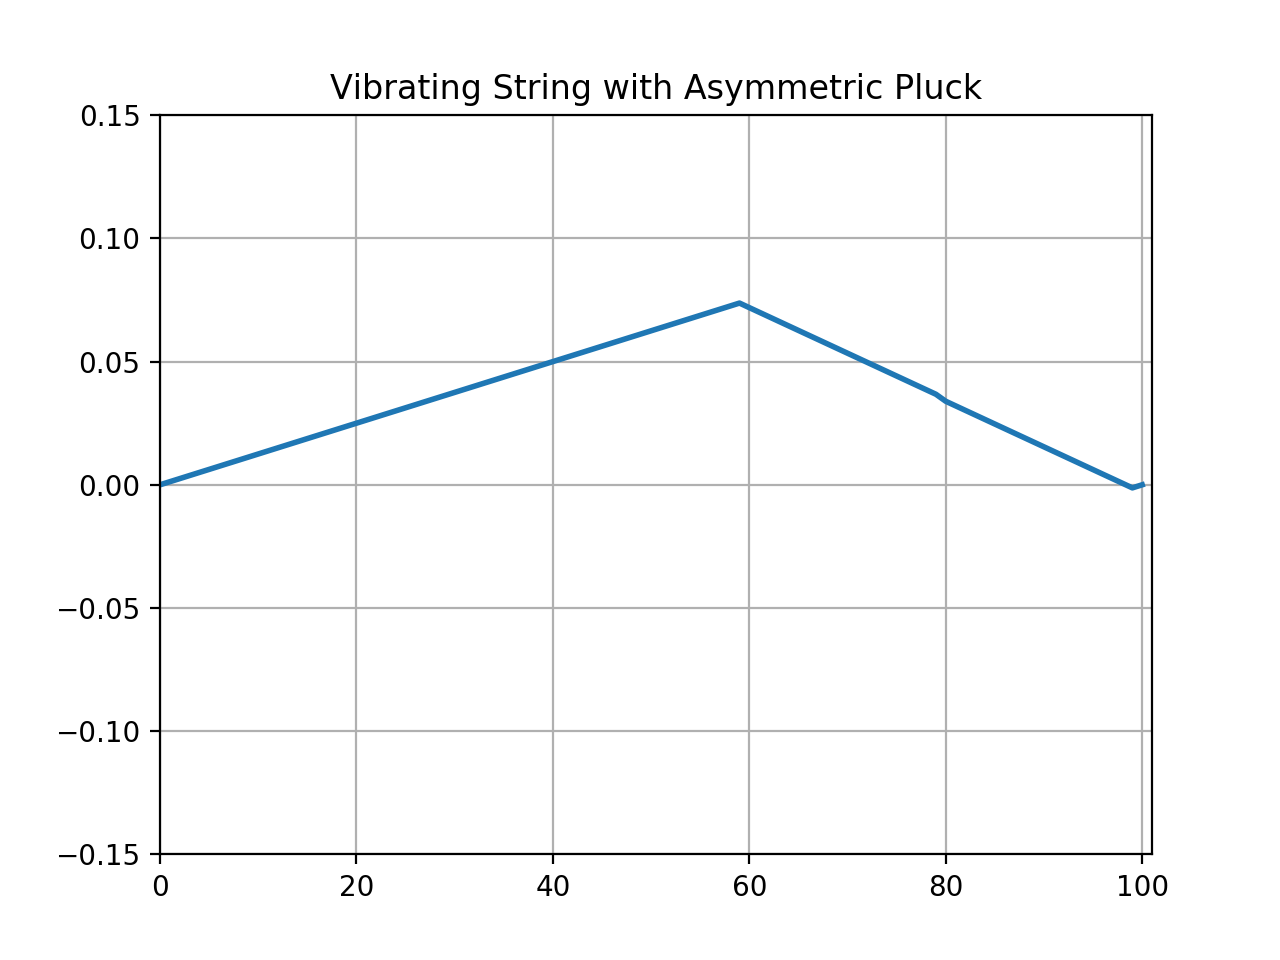

finished


In [7]:
#### EqStringAnimate.py, Notebook Version, Vibrating string + MatPlotLib
% matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters (in problem set 5, you'll add L and derive the x and t steps from N and CFL)
N = 101
mu = 0.01                                                # string density
ten = 40.                                                  # string tension
c = np.sqrt(ten/mu)                                       # Propagation speed
c1 = c                                               # CFL criterion. You'll make better use of this in Problem set 5.
ratio =  c*c/(c1*c1)
# Initialization
xi = np.zeros( (N, 3), float)                    # N x's & 3 t's to save memory (only need 3 times for algorithm)
k=range(0,N)
ipluck=0.8
def init():
    for i in range(0, int(ipluck*N)):
        xi[i, 0] = 0.1*i/int(ipluck*N)          # Initial condition: string plucked,shape
    for i in range (int(ipluck*N), N):                           # first part of string
        xi[i, 0] = 0.1 - 0.1/(N*(1-ipluck))*(i - int(ipluck*N))                 # second part of string

init()                                     # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String with Asymmetric Pluck")
line, = ax.plot(k, xi[k,0], lw=2)             # x axis, y values, linewidth=2     

# Later time steps
for i in range(1, N-1):                                      # use  algorithm
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(k,xi[k,2])                              # data to plot ,x,y           
    for m in range (0,N):                               # part of algorithm
        xi[m, 0] = xi[m, 1]                               # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,
# next: animation(figure, function,dummy argument: 1      
ani = animation.FuncAnimation(fig, animate,1)           
plt.show()             
print("finished")

### Exploration

Try setting different initial conditions for the string (different plucking), and check that the behavior matches your expectations.


<IPython.core.display.Javascript object>


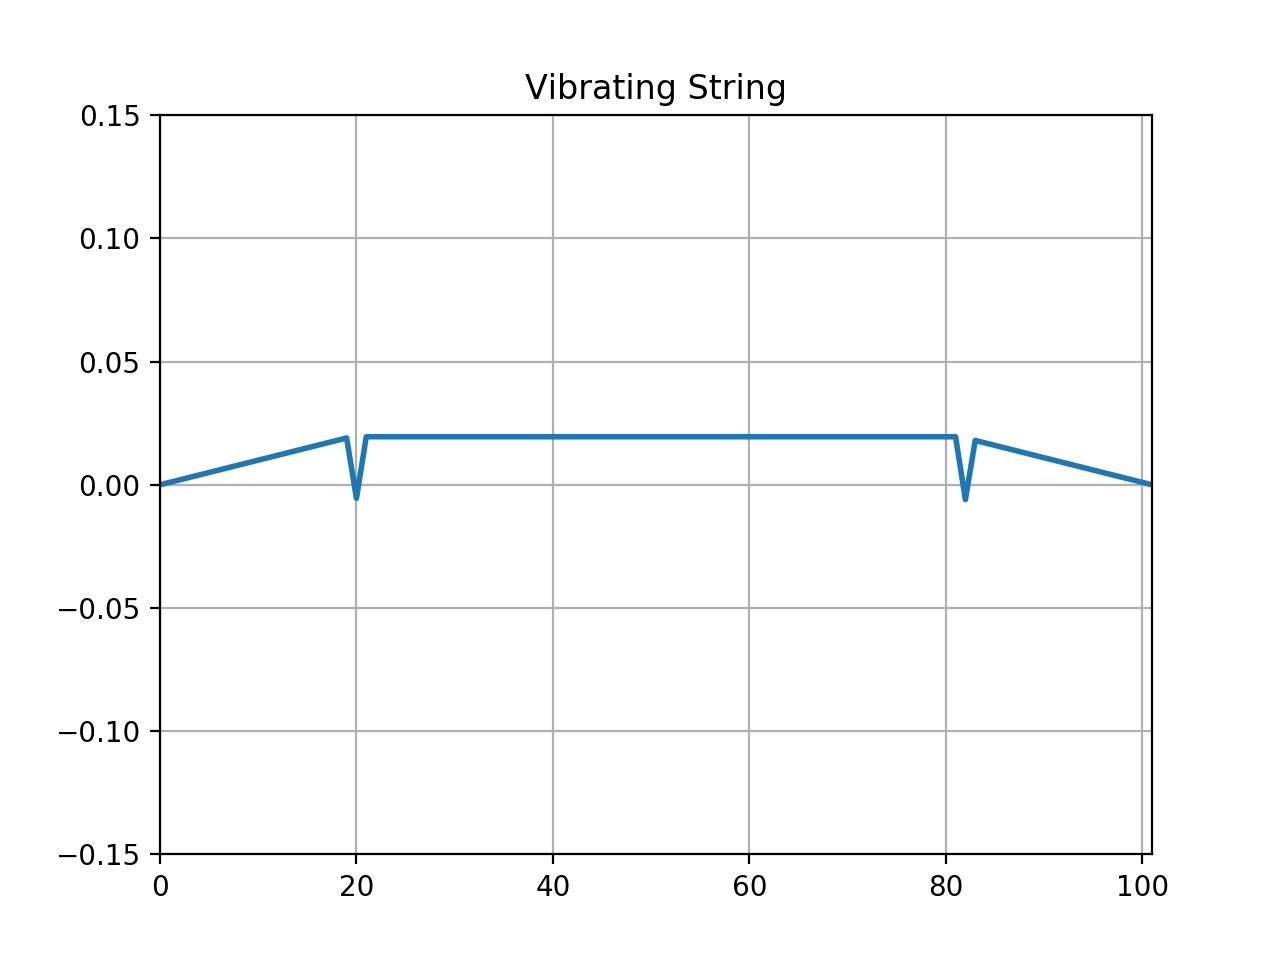

finished


In [8]:
#### EqStringAnimate.py, Notebook Version, Vibrating string + MatPlotLib
% matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
N = 102
mu = 0.01                                                # string density
ten = 40.                                                  # string tension
c = np.sqrt(ten/mu)                                       # Propagation speed
c1 = c                                                      # CFL criterion
ratio =  c*c/(c1*c1)
# Initialization
xi = np.zeros( (N, 3), float)                            # 101 x's & 3 t's 
k=range(0,N)
def init():
    for i in range(0,int(N/2)):
        xi[i,0] = 0.001*i
    for i in range(int(N/2)+1,N):
        xi[i,0] = xi[int(N/2)-1,0] -0.001 * (i-(int(N/2)-1)) +.001

#    for i in range(0,N):
#         xi[i,0] = 0.1 * np.sin(10*np.pi*i/(N-1))    
    
init()                                     # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N-1), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String")
line, = ax.plot(k, xi[k,0], lw=2)             # x axis, y values, linewidth=2     

# Later time steps
for i in range(1, N-1):                                      # use  algorithm
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(k,xi[k,2])                              # data to plot ,x,y           
    for m in range (0,N-1):                               # part of algorithm
        xi[m, 0] = xi[m, 1]                               # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,
# next: animation(figure, function,dummy argument: 1      
ani = animation.FuncAnimation(fig, animate,1,interval=100)           
plt.show()             
print("finished")

## Stability (Courant condition)

Issue: we saw in the heat equation case that the step sizes in space and time, $h_x$ and $h_t$, repectively, must be chosen consistently for stable results.

* stability for the wave equation is not covered in the textbook, though there is the discussion of stability for the heat equation, as noted last time. 
* details are available elsewhere, *e.g.*, in [Trefethen's book](https://people.maths.ox.ac.uk/trefethen/4all.pdf). This simplified discussion is adapted from there. (Thanks for the pointer and the idea, J. Nielsen!)
* stability analysis details are equation dependent

Analysis for wave equation: define $u_0(x) \equiv u(x,0)$, the initial condition.

* can typically be written as a Fourier series
* all of the Fourier modes will evolve with time -- each is its own solution to the wave equation.
* look at how the modes evolve

Simplest to start with a first-order PDE:

$$\frac{\partial u}{\partial t} = C \frac{\partial u}{\partial x}$$

A central-difference substitution gives:

$$u(x,t + h_t) = u(x,t) + C\frac{h_t}{h_x} \left[ u(x+h_x, t) - u(x,t) \right]$$


**What is required so that the numerical solution captures the evolution of all of the modes accurately?**

Initially ($t=0$), we have spatial functions of the form
$$u_0(x) = e^{ikx}$$

After a time step, the system evolved according to the finite difference equation:

$$\begin{align}
u(x, h_t) &= e^{ikx} + C\frac{h_t}{h_x} \left[ e^{ik(x+h_x)} - e^{ikx} \right] \\
&= \left[ 1 + C\frac{h_t}{h_x}\left( e^{ikh_x} - 1 \right) \right] e^{ikx} \\
&= G(k) e^{ikx} \\
&= G(k) u_0(x) \\
\end{align}$$

where $G(k)$ is effectively a *growth factor* or *amplification factor* that multiplies the previous result at each time step.

* After $n$ time steps, the growth becomes $G^n(k)$.

* The solution becomes unstable and blows up if $|G|>1$.

Similarly to the heat equation analysis, the largest $|G|$ occurs when $kh_x = \pi$.  In that case,

$$\begin{align}
|G| & \leq 1 \\
\left| 1-2 C \frac{h_t}{h_x} \right| & \leq 1 \\
-1 + 2C \frac{h_t}{h_x} & \leq 1 \\
C\frac{h_t}{h_x} & \leq 1
\end{align}$$

In the textbook, this is

$$c \leq C' = \frac{\Delta x}{\Delta t}$$

As before, the stability condition implies:

* the solution should get better with smaller *time* steps $h_t$ but 
* the solution gets worse for smaller *space* steps $h_x$ unless accompanied by a correspondingly smaller $h_t$. 

The space-time symmetry is broken here not by the equation but by the boundary
conditions: 
* initial position condition and with boundary conditions fixed for all time.

Here are some examples of mesh grids $\lambda = C h_t/h_x$ from Trefethen that are good and bad. The starting time is in the "front".

<img src="Figures/Trefethen_1.png" width="50%">
<img src="Figures/Trefethen_2.png" width="50%">

This behavior is reminiscent of what we saw in our trials with the heat equation.

Conveniently, the same condition holds when the stability analysis is applied to the second-order PDE.

$$\lambda \equiv \left| C \frac{h_t}{h_x} \right| \leq 1$$

To see this, 
* recall that for oscillators we rewrote a 2nd order equation as two first-order equations and vectorized the solution. 
* this suggests a way to "upscale" our first-order stability PDE analysis: rewrite the second-order differential equation as two first-order equations in linear algebra form:

$$\frac{\partial}{\partial t} 
\begin{bmatrix}
\frac{\partial u}{\partial t} \\
C \frac{\partial u}{\partial x}
\end{bmatrix}
=
\begin{bmatrix}
0 & C \\
C & 0
\end{bmatrix}
\frac{\partial}{\partial x} 
\begin{bmatrix}
\frac{\partial u}{\partial t} \\
C \frac{\partial u}{\partial x}
\end{bmatrix}
$$

We can treat this as a vector version of the first-order equation, and the same stability conditions apply.

-----
----

### Complications and enhancements
See your textbook for including:
* energy loss processes (e.g., friction)
* gravity and position-dependent tension 
* velocity dispersion

-------
-------
Now let's have a look at Problem Set 5...